In [ ]:
# Drive mount
from google.colab import drive
drive.mount('/content/drive')

# go to path
base_path = "drive/Shareddrives/DL_Project/"
%cd "drive/Shareddrives/DL_Project/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/Shareddrives/DL_Project/'
/content/drive/Shareddrives/DL_Project


In [ ]:
# Install YOLO framework
! pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.4/779.4 kB 4.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
# Imports
from PIL import Image
from tqdm import tqdm
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import torch
import sys
import os

100%|██████████| 49.7M/49.7M [00:00<00:00, 229MB/s]



image 1/1 /content/drive/Shareddrives/DL_Project/imgs/car.jpg: 544x640 1 car, 75.2ms
Speed: 14.9ms preprocess, 75.2ms inference, 1992.6ms postprocess per image at shape (1, 3, 544, 640)


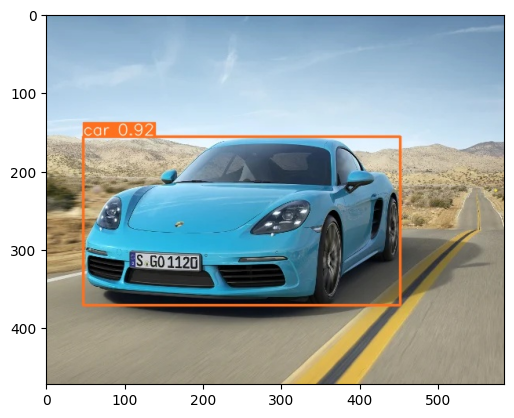

In [ ]:
# Load a pretrained YOLOv8n model
# Small pre-trained model
# model = YOLO("yolov8n.pt", )
# Larger pre-trained model
model = YOLO("yolov8m.pt", )

# Run inference on 'car.jpg'
results = model("imgs/car.jpg")[0]  # results list

# Save results to disk
results.save(filename="imgs/results.jpg")

# Show image
img = mpimg.imread("imgs/results.jpg")
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Model summary
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0-1): 2 x Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=Tr

In [ ]:
# Extract features for dataset for layer 21
images_path = "car_data/all_images"
# features_save_path = "extracted_features/yolov8n_features"
features_save_path = "extracted_features/yolov8m_features"
extraction_layer = 21

# Load a pretrained YOLOv8n model
# model = YOLO("yolov8n.pt", )
model = YOLO("yolov8m.pt", )

# Function to extract features from image
def extract_features(path, extraction_layer):
  embeddings = model.predict(path, save=False, embed=[extraction_layer])[0]
  return embeddings

# Function to extract features from images and save file
def extract_and_save(images_path, features_save_path, extraction_layer):
  features_list = []
  id_list = []
  images_len = len(os.listdir(images_path))

  for i, filename in enumerate(os.listdir(images_path)):
    if (i % 1000) == 0:
      print(f'{i}/{images_len}')
    img_path = os.path.join(images_path, filename)
    if os.path.isfile(img_path):
      # Extract features
      id_list.append(int(filename.split('.')[0]))
      features_list.append(extract_features(img_path, extraction_layer))

  # Save
  features_dict = {id_list[i]: features_list[i] for i in range(len(id_list))}
  with open(f'{features_save_path}.pkl', 'wb') as file:
    pickle.dump(features_dict, file)

extract_and_save(images_path, features_save_path, extraction_layer)

0/16185





















































































































































































































































































































































































































































































































































































































































































































































































































































































































/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Streaming output truncated to the last 5000 lines.










































































































































































































































































































































































































































































































































































































































































































































































































































12000/16185

































































































































In [ ]:
# Load features
features_save_path = "extracted_features/yolov8m_features.pkl"

with open(features_save_path, 'rb') as file:
  features_dict = unserialized_data = pickle.load(file)

print(len(features_dict.keys()))

16185
